Import

In [47]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [28]:
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
FILE_PATH = '../data/predictive_maintenance.csv'

Read data

In [25]:
df = pd.read_csv(FILE_PATH, index_col='UDI')
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


In [7]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Target
0    9661
1     339
Name: count, dtype: int64

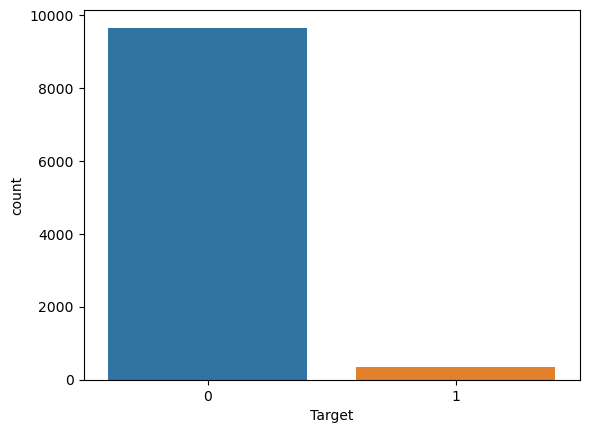

In [29]:
sns.countplot(x='Target', data=df)
df['Target'].value_counts()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Power Failure'),
  Text(1, 0, 'Tool Wear Failure'),
  Text(2, 0, 'Overstrain Failure'),
  Text(3, 0, 'No Failure'),
  Text(4, 0, 'Heat Dissipation Failure')])

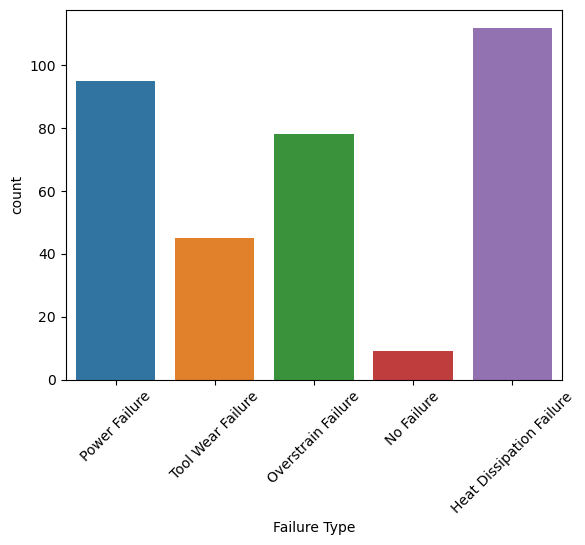

In [30]:
sns.countplot(x='Failure Type', data=df[df['Target']==1])
df['Failure Type'].value_counts()
plt.xticks(rotation=45)

In [41]:
def visualize_df(_df, nb_col=2):
    columns = _df.columns
    nb_row = math.ceil(len(columns)/nb_col )
    print(nb_row)
    for i, col in enumerate(columns):
        print(f'{i} : {col} : {_df[col].dtype}')

In [46]:
visualize_df(df,5)

2
0 : Product ID : object
1 : Type : object
2 : Air temperature [K] : float64
3 : Process temperature [K] : float64
4 : Rotational speed [rpm] : int64
5 : Torque [Nm] : float64
6 : Tool wear [min] : int64
7 : Target : int64
8 : Failure Type : object
